# Individual Project: Open Case Studies: Exploring CO2 emissions across time using Python

Reference:[Open Case Studies: Exploring CO2 emissions across time]
(https://github.com/opencasestudies/ocs-bp-co2-emissions)                     

## Motivation
I picked Canada to analyze for this case study because Canada is so close in proximity to the US so environmentally they are pretty similar. However, the US and Canada do differ in terms of their approach towards climate change as they have different approaches and regulations. In Canada they have a national carbon tax and other more federally / nationally standardized regulations while the US has a relatively more unstandardized system, as many regulations and initiatives are set-forth by individual states and there federal government has varying degrees of involvement. I would like to see if this difference in regulation between the two nations result in some statistically important data trends. 

Some facts about CO2 emissions for Canada are:
- In 2023 their total greenhouse gas emissions was 694 megatonnes(Mt) of CO2, which was actually a 0.9% decrease from 700 Mt in 2022. 
- Since 2005, Canada’s GHG emissions have decreased by 8.5%, but have increased by 14.4% since 1990.
- The oil and gas industry is the country’s largest source of emissions accounting for about one-third of Canada’s total GHG emissions. Transportation is the second-largest source, responsible for about 160 MtCO₂e.
- The targets that Canada has set for emission reduction include: reducing emissions 40–45% below 2005 levels by 2030, 45–50% by 2035, and achieving net-zero emissions by 2050. These targets are outlined in government policies and the Net-Zero Emissions Accountability Act.
- The tax started at C$20/tonne CO₂ in 2019 and had reached C$80/tonne by April 2024. But in 2025 the tax was removed.  



## Main Questions
__Our main questions:__

1.) How have global CO2 emission rates changed over time? In particular for Canada, and how does Canada compare to other countries?

2.) Are CO2 emissions in Canada, global temperatures, and natural disaster rates in Canada associated?

## What is the Data? 

### Where is the data from? 
In this final group project, I will be replicating a case study conducted by bloomberg using python and focusing on Canada instead of the US. The orignal case study was done in R. The raw data that this study uses will be CO2 emission data from all over the world, major natural disaster disaster data from Canada, energy use per person data from all over the world, GDP per capital yearly growth data from all over the world, and mean surface air temperature from Canada. The source of the raw data that consists of data from all over the world is from **Gapminder** which they have originally sourced from the World Bank. While the source of the raw data for the annual average temperature departures from 1961 to 1990 of Canada is from Environment Canada (a website by the Canadian government) and the raw data for disaster data for Canada is from public EM-DAT. 

### What does the data measure (with an example of a given values of the variable of interest and its meaning? 

- The CO2 emissions data measures the amount of CO2 emissions for a country in a specific year in Mt. 
    - For example if I was given Latvia, 1931, 36.7 that means that in 1931, Latvia's CO2 emissions was 36.7 Mt. 

- The GDP growth data measures the percentage that the GDP grew in a specific year. 
    - For example if I was given Bangladesh, 1897, 18.100 that means that in 1897, Bangladesh's GDP grew by 18.1%

- The Energy use per person data measures the amount of energy used person in kg of oil used. 
    - For example if I was given New Zealand, 1999, 4310 that means that in 1999, the people on average used 4310 kg of oil per person. 

- The annual average temperature departures from 1961 to 1990 of Canada measures the amount of degrees celsius that a specific year's mean surfae air temperature deviates from a set reference point that was calculated using the data collected from 1961 to 1990.
    - For example if I was given 2005, 1.6 it means that in 2005 the annual average temperature was 1.6 degrees celsius higher than the reference point. 

- The raw disaster data measures the characteristics of a major disasters between 1900 to 2025. These characteristics include the type of disaster it was (eg. hydrological, climatological, biological, etc.), year, sub-type ((eg. flood, storm, hail, fire etc.), and many more characteristics. 
    - For example if I was given 1915, hydrological, avalanche, Canada it means that, that specific data point is from a disaster that happened in 1915 in Canada which was a hydrological disaster and more specifically an avalance. 


## Limitations
In the datasets that I used, there are many NaN values. NaN is inputted for whenever there isn't data availiable for that country for that specific year. However this doesn't mean that nothing happened in that country during that year, the data was just not collected. This means that the data set is not fully comprehensive. 
I would also note that a specific caveat of the Canada temperature dataset, is that there are some major breaks in the data. 



---
## Data Import

First, I will import all the python packages and libraries that I will need to complete this case study replication. 

In [1]:
!pip install plotnine
!pip install adjustText
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

Next, I will import all the data that does not require additional data manipulation. These will be the data regarding energy, GDP growth, and CO2 emissions. 

In [2]:
energy_df = pd.read_excel("https://github.com/opencasestudies/ocs-bp-co2-emissions/raw/refs/heads/master/data/raw/energy_use_per_person.xlsx")
gdpGrowth_df = pd.read_excel("https://github.com/opencasestudies/ocs-bp-co2-emissions/raw/refs/heads/master/data/raw/gdp_per_capita_yearly_growth.xlsx")
CO2_df = pd.read_excel("https://github.com/opencasestudies/ocs-bp-co2-emissions/raw/refs/heads/master/data/raw/yearly_co2_emissions_1000_tonnes.xlsx")


print(energy_df.head(10))
print(gdpGrowth_df.head(10))
print(CO2_df.head(10))

               country    1960    1961    1962    1963    1964    1965  \
0              Albania     NaN     NaN     NaN     NaN     NaN     NaN   
1              Algeria     NaN     NaN     NaN     NaN     NaN     NaN   
2               Angola     NaN     NaN     NaN     NaN     NaN     NaN   
3  Antigua and Barbuda     NaN     NaN     NaN     NaN     NaN     NaN   
4            Argentina     NaN     NaN     NaN     NaN     NaN     NaN   
5              Armenia     NaN     NaN     NaN     NaN     NaN     NaN   
6            Australia  3060.0  3120.0  3170.0  3280.0  3350.0  3460.0   
7              Austria  1550.0  1550.0  1680.0  1820.0  1860.0  1850.0   
8           Azerbaijan     NaN     NaN     NaN     NaN     NaN     NaN   
9              Bahamas     NaN     NaN     NaN     NaN     NaN     NaN   

     1966    1967    1968  ...    2006    2007    2008    2009    2010  \
0     NaN     NaN     NaN  ...   707.0   680.0   711.0   732.0   729.0   
1     NaN     NaN     NaN  ...  1030.

Now I will import the data that are Canada specific! 

In the temperature data, the 1st, 2nd, and 82nd - 84th row differs in the number of columns as the later rows in the dataset due to the fact that those rows just contain comments or clarifications on the data and not actual data. Thus these rows should be skipped when generating the dataframe!


In [3]:
disasters_df = pd.read_excel("https://github.com/alyssachew-dot/Envecon-105-data/raw/refs/heads/main/public_emdat_custom_request_2025-08-17_39e17006-0dd7-4056-8fff-88160fe51c44.xlsx")#, skiprows = 1)
temperature_df = pd.read_csv("https://raw.githubusercontent.com/alyssachew-dot/Envecon-105-data/refs/heads/main/Temperature-change-annual-en.csv", skiprows = [0, 1, 80, 81, 82, 83]) #, na_values = ["-99"] )


print(disasters_df.head(10))
print(disasters_df.tail(10))
print(temperature_df.head(10))
print(temperature_df.tail(10))

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
1  1903-0002-USA      Yes    nat-hyd-flo-flo        Natural      Hydrological   
2  1903-0003-USA      Yes    nat-hyd-flo-flo        Natural      Hydrological   
3  1903-0006-CAN      Yes    nat-geo-mmd-roc        Natural       Geophysical   
4  1903-0010-USA      Yes    nat-met-sto-tor        Natural    Meteorological   
5  1905-0005-CAN      Yes    nat-geo-mmd-roc        Natural       Geophysical   
6  1906-0004-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
7  1906-0005-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
8  1906-0013-USA      Yes    nat-geo-ear-gro        Natural       Geophysical   
9  1908-0011-CAN      Yes    nat-geo-mmd-lan        Natural       Geophysical   

         Disaster Type  Disaster Subtype External IDs Event Name  ISO  ...  \
0                Storm  Tropic

---
## Data Wrangling

Now we are going to manipulate the formatting of our data so that later on we can more effectively use our data to evaluate our main questions regarding CO2 emission. 

**Yearly CO2 Emissions** 

First, we will begin by wrangling our Yearly CO2 Emissions raw data. 

We are first going to take a look at just the raw CO2 data (CO2_df) using `print(CO2_df.head(10))`
We will then look at a random sample of 5 rows from this raw data via `print(CO2_df.sample(n = 5))` with the seed set to `123`

In [4]:
print(CO2_df.head(10))
np.random.seed(123)
print(CO2_df.sample(n = 5))

               country  1751  1752  1753  1754  1755  1756  1757  1758  1759  \
0          Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4               Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7              Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8            Australia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9              Austria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...      2005      2006      2007      2008      2009      2010      2011  \
0  ...    1330.0    1650.0    2270.0   

Next we will use the `.info()` function to get a general idea of the size and contents (including data type) of the CO2 emissions dataframe.
We will also be using `CO2_df[["country"]]` to create a dataframe of all the different country data entries in this dataframe, which allows us to easily view all these countries. 

In [5]:
CO2_df.info() #closest to glimpse when combined with head
print(CO2_df[["country"]])
cols_CO2_df = pd.DataFrame(CO2_df.columns, columns=["column_name"])
print(cols_CO2_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 265 entries, country to 2014
dtypes: float64(264), object(1)
memory usage: 397.6+ KB
         country
0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
..           ...
187    Venezuela
188      Vietnam
189        Yemen
190       Zambia
191     Zimbabwe

[192 rows x 1 columns]
    column_name
0       country
1          1751
2          1752
3          1753
4          1754
..          ...
260        2010
261        2011
262        2012
263        2013
264        2014

[265 rows x 1 columns]


Our dataframe is currently in the `wide` format and this means that each of the variables are given their own individual columns. We will convert our dataframe into a `long` format to make it more usable for data visualization.
We do so with the `melt()` function. 
    
We are going to collapse all of the values for emission data across all individual years into a new column that we have named `Emissions`. Then to identify what year those values hailed from we will create a new column `Year`. We want to keep the `country` column from the wide dataframe as one of columns for this long data frame, thus we set `country` as an `ID variable` via `id_vars = ["country"]`. Consequently, all other values in the original dataframe will be used as `value variables` and become pivoted into the long format

In [6]:
CO2_df_long = CO2_df.melt(
    id_vars = ["country"],          
    var_name = "Year",              
    value_name = "Emissions") 

Now, to capitalize our `country` variable we use the `rename()` function with the argument `{"country": "Country"}`

Then to convert all of the data entries in the `Year` column from class type `character` into a `numeric` variable we use the `to_numeric()` function. The `errors = "coerce"` is to ensure that in the case there are data entries that cannot be converted into a numeric variable those data entries shall be converted to `NaN`

Finally, we would like to view all the distinct values of the `Country` to ensure that our data is properly wrangled we use the `drop_duplicates()` function to make sure we see only the distinct values and the `to_list()` function to see those distinct values in a list format. 
 

In [7]:
CO2_df_long = CO2_df_long.rename(columns = {"country": "Country"})
CO2_df_long["Year"] = pd.to_numeric(CO2_df_long["Year"], errors = "coerce")
CO2_df_long["Label"] = "CO2 Emissions (Metric Tons)"
print(CO2_df_long.sample(n = 5))

CO2_df_long["Country"].drop_duplicates().tolist()

               Country  Year  Emissions                        Label
3640           Uruguay  1769        NaN  CO2 Emissions (Metric Tons)
34651           Latvia  1931       36.7  CO2 Emissions (Metric Tons)
13323            India  1820        NaN  CO2 Emissions (Metric Tons)
21638             Peru  1863        NaN  CO2 Emissions (Metric Tons)
33750  Slovak Republic  1926    11600.0  CO2 Emissions (Metric Tons)


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland

We have finally completed our data wrangling of the CO2 emissions data, time to move on to the `Yearly Growth in GDP per Capita` data!

**Yearly Growth in GDP per Capita** 

Here, we will begin wrangling our **Yearly Growth in GDP per Capita** raw data. 

We will begin by taking a random sample of 5 rows in the Yearly Growth in GDP per Capita dataframe `gdpGrowth_df`. 

Then to examine the size of the dataframe we use the function `shape()` which the number of rows and columns of a dataframe in the form of a `tuple` formated like `(# rows, # columns)`

In [8]:
#print(gdpGrowth_df.sample(n = 5))
print(gdpGrowth_df.shape)

(194, 220)


There are **194** rows and **220** columns with the first row being a `country` column and columns being different years 

We will now follow the same data wrangling process as the `CO2 emissions` data. 

First, we will convert our currently **wide** formatted `gdpGrowth_df` into a **long** format with the `melt()` function.
Then, we will (like previously) change the `country` to be capitalized using the `rename()` function and convert the `Year` variable from a `character` variable to a `numeric` variable using the `to_numeric()` function. We would also like to rename a `gdp_growth` variable to `GDP` using the `rename()` function. 

Finally, we would like to view all the distinct values of the `Country` to ensure that our data is properly wrangled. And we would like to use the `groupby()` function to ensure that all of the distinct values in `Year` has data entries from all the countries in `Country`. 


In [9]:
gdp_df_long = gdpGrowth_df.melt(
    id_vars = ["country"],          
    var_name = "Year",              
    value_name = "gdp_growth") 

gdp_df_long = gdp_df_long.rename(columns = {"country": "Country"})
gdp_df_long["Year"] = pd.to_numeric(gdp_df_long["Year"], errors = "coerce")
gdp_df_long["Label"] = "GDP Growth/Capita (%)"
gdp_df_long = gdp_df_long.rename(columns = {"gdp_growth": "GDP"})
print(gdp_df_long.sample(n = 5))

gdp_df_long["Country"].drop_duplicates().tolist()
print(gdp_df_long.groupby('Year').size().reset_index(name = 'count'))

                              Country  Year     GDP                  Label
42261  St. Vincent and the Grenadines  2018   3.180  GDP Growth/Capita (%)
18713                 Kyrgyz Republic  1897   0.866  GDP Growth/Capita (%)
29520        Central African Republic  1953   2.230  GDP Growth/Capita (%)
18637                      Bangladesh  1897  18.100  GDP Growth/Capita (%)
3364                          Grenada  1818     NaN  GDP Growth/Capita (%)
     Year  count
0    1801    194
1    1802    194
2    1803    194
3    1804    194
4    1805    194
..    ...    ...
214  2015    194
215  2016    194
216  2017    194
217  2018    194
218  2019    194

[219 rows x 2 columns]


Every single year having a `n` of **194** (the number of countries we had in our raw `energy_df` dataframe)signifies that we have wrangled our GDP growth data correctly! 

Thus we have officially completed our wrangling of the GDP growth data and can move onto wrangling our `Energy Use per Person` raw data!

**Energy Use per Person** 

Now, we shall begin wrangling our **Energy Use per Person** raw data. 

We will once again begin by taking a random sample of 5 rows in the Energy Use per Person dataframe `energy_df` and use the `.info()` function to get a generalized grasp of the data in `energy_df`. 

In [10]:
print(energy_df.sample(n = 5))
print(energy_df.info())

             country    1960    1961    1962    1963    1964    1965    1966  \
116             Peru     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
160    United States  5640.0  5610.0  5770.0  5990.0  6140.0  6310.0  6590.0   
92             Malta     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
144           Sweden  2700.0  2740.0  2890.0  3080.0  3270.0  3440.0  3640.0   
82   Kyrgyz Republic     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       1967    1968  ...    2006    2007    2008    2009    2010    2011  \
116     NaN     NaN  ...   474.0   507.0   525.0   543.0   635.0   638.0   
160  6810.0  7070.0  ...  7700.0  7760.0  7490.0  7060.0  7160.0  7030.0   
92      NaN     NaN  ...  2060.0  2160.0  2040.0  1890.0  2010.0  1990.0   
144  3630.0  4000.0  ...  5530.0  5470.0  5380.0  4880.0  5430.0  5270.0   
82      NaN     NaN  ...   485.0   561.0   594.0   536.0   505.0   600.0   

       2012    2013    2014    2015  
116   678.0   666.0   76

After our data visualization, we can conclude that we have **169** rows and **57** columns, once again with the first column being a `country` column and the remaining columns being different `years`.

We are once again going to be using the same data wrangling process as both the **CO2 emissions** data and the **GDP Growth** data. 

To wrangle our **Energy Use per Person** data we will once again convert the data from **wide** formatting to **long** formatting. Then we will capitalize the `country` variable, convert the `Year` values from character to numeric variables, then lastly rename the `energy_use` variable to `Energy`. 

In [11]:
energy_df_long = energy_df.melt(
    id_vars = ["country"],          
    var_name = "Year",              
    value_name = "energy_use") 

energy_df_long = energy_df_long.rename(columns = {"country": "Country"})
energy_df_long["Year"] = pd.to_numeric(energy_df_long["Year"], errors = "coerce")
energy_df_long["Label"] = "Energy Use (kg, oil-eq./capita)"
print(energy_df_long.sample(n = 5))

     Country  Year  energy_use                            Label
7855  Kuwait  2006     10800.0  Energy Use (kg, oil-eq./capita)
8070  Serbia  2007      2250.0  Energy Use (kg, oil-eq./capita)
1426   Italy  1968      1700.0  Energy Use (kg, oil-eq./capita)
9441   Syria  2015         NaN  Energy Use (kg, oil-eq./capita)
5632  Gambia  1993         NaN  Energy Use (kg, oil-eq./capita)


Finally, we would once again like to view all the distinct values of the `Country` to ensure that our data is properly wrangled. And we would like to use the `groupby()` function to ensure that all of the distinct values in `Year` has data entries from all the countries in `Country`.

In [12]:
print(energy_df_long["Country"].drop_duplicates().tolist())
print(energy_df_long.groupby('Year').size().reset_index(name = 'count'))

['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyz Republic', 'Latvia'

Every single year having a `n` of **169** (the number of countries we had in our raw `energy_df` dataframe) signifies that we have wrangled our GDP growth data correctly!

We have officially completed the data wrangling of all our **global** raw data! Now we will move on to wrangling the **US specific** data starting with our `Disasters` raw data! 

#### Canada Specific Data

**Disasters**

Now, we will begin wrangling our **Disasters** raw data. 

In the **Disasters** raw dataframe `disasters_df` we are only interested in the `Year` column and the rows that have **"Canada"** as their country value. 

The other variables are useful pieces of data like type of disaster, the number of deaths that specific disaster caused, group of disaster, etc. 

However, for the purposes of this case study we will only be using the columns that allow us to determine the  **number of disasters** that occured each year in **Canada**. 

We will use several lines of code to achieve our selection. We first create a list `cols` of all the column names that we want our dataframe to include. Then I only select for the rows that have `Canada` as their country value, all other rows can be omited. 

Then, just to ensure that proper data wrangling occured a list of all the column names in our unaltered raw data was generated `totCols` and was compared with `cols` to ensure the proper columns were selected for. The columns other than `Start Year` were included to enable easier cross checking that my data wrangling was proper and successful. 

In [13]:
cols = ["Start Year"] + ["Disaster Subgroup"] + ["Disaster Type"] + ["Country"]
print(cols)
sel_disasters_df = disasters_df[cols]
sel_disasters_df = sel_disasters_df[sel_disasters_df["Country"] == "Canada"]
print(sel_disasters_df.sample(n = 10))
totCols = [col for col in sel_disasters_df.columns]
print(totCols)

['Start Year', 'Disaster Subgroup', 'Disaster Type', 'Country']
     Start Year Disaster Subgroup        Disaster Type Country
5          1905       Geophysical  Mass movement (dry)  Canada
9          1908       Geophysical  Mass movement (dry)  Canada
765        2004    Meteorological                Storm  Canada
776        2004      Hydrological                Flood  Canada
716        2002      Hydrological                Flood  Canada
70         1950    Meteorological                Storm  Canada
816        2006      Hydrological                Flood  Canada
876        2008      Hydrological                Flood  Canada
815        2006      Hydrological                Flood  Canada
804        2005      Hydrological                Flood  Canada
['Start Year', 'Disaster Subgroup', 'Disaster Type', 'Country']


Now we are creating a new dataframe called `tot_disasters_df` that sums up the total number of disasters for each year in `Canada`. 
                                                                                                                     
I then create a new dataframe `tot_disasters_df` with a column named `"Disasters"` which is populated by values gained from using the `.value_counts()` function on the `Start Year` column. This function allows me to count the number of times a certain year appears in the `sel_disasters_df` which gives me the total number of disasters that occured for that year. I then rename the `index` column to `Start Year`. Afterwards, I order the dataframe in increasing `Start Year` order using the `.sort_values()` function. 

Next, I create a new dataframe `all_years` that has rows for every year in the range that the raw data included using the `range()` function in conjuction with the `.min()` and `.max()` functions. The rows for some of the years were lost in this data wrangling process because in this dataset, some years didn't have any disasters that occured in Canada and only in the US. So when we dropped all the rows with US as the country, we ended up losing some of those years. We then used the `.fillna(0)` function to fill up all the NaN values (values where Canada didn't have any disasters according to this dataset) with `0`.

In [14]:
tot_disasters_df = sel_disasters_df["Start Year"].value_counts().reset_index(name = "Disasters")
tot_disasters_df = tot_disasters_df.rename(columns = {"index": "Start Year"})
tot_disasters_df = tot_disasters_df.sort_values("Start Year").reset_index(drop = True)

all_years = pd.DataFrame({"Start Year": range(tot_disasters_df["Start Year"].min(), tot_disasters_df["Start Year"].max() + 2)})
year_counts_full = all_years.merge(tot_disasters_df, on = "Start Year", how = "left")
year_counts_full["Disasters"] = year_counts_full["Disasters"].fillna(0).astype(int)

print(year_counts_full)

     Start Year  Disasters
0          1903          1
1          1904          0
2          1905          1
3          1906          0
4          1907          0
..          ...        ...
118        2021          4
119        2022          6
120        2023          4
121        2024          7
122        2025          0

[123 rows x 2 columns]


Finally, we will add a `Country` column that just contains the value **"United States"** and rename the column `Start Year` to `Year`. 

In [15]:
year_counts_full["Country"] = "Canada" 
year_counts_full = year_counts_full.rename(columns = {"Start Year": "Year"})
print(year_counts_full)

     Year  Disasters Country
0    1903          1  Canada
1    1904          0  Canada
2    1905          1  Canada
3    1906          0  Canada
4    1907          0  Canada
..    ...        ...     ...
118  2021          4  Canada
119  2022          6  Canada
120  2023          4  Canada
121  2024          7  Canada
122  2025          0  Canada

[123 rows x 3 columns]


Now we will follow a very similar the data wrangling process we have used above. We will change from **wide** form to **long** form, rename some variables, and add a label. 

In [16]:
sel_disasters_df_long = year_counts_full.melt(
    id_vars=["Country", "Year"],   # keep these fixed
    var_name = "Indicator",          # new column for former column names
    value_name = "Value"              # new column for the values
)
sel_disasters_df_long["Label"] = "Number of Disasters"

reorder_col = ["Year"] + ["Country"] + ["Indicator"] + ["Value"] + ["Label"]
sel_disasters_df_long = sel_disasters_df_long[reorder_col]
print(sel_disasters_df_long.sample(n = 5))

    Year Country  Indicator  Value                Label
99  2002  Canada  Disasters      3  Number of Disasters
66  1969  Canada  Disasters      0  Number of Disasters
98  2001  Canada  Disasters      3  Number of Disasters
73  1976  Canada  Disasters      0  Number of Disasters
9   1912  Canada  Disasters      1  Number of Disasters


Upon inspecting `sel_disasters_df_long` we can conclude that we have successfully wrangled the **Disasters** raw data! 

We can now move on to the last set of raw data that we must wrangle: `Temperature`!

**Temperature**

Finally, we will begin wrangling our last set of raw data **Temperature** raw data. This particular dataset doesn't actually require much wrangling! Such a nice end to our individual data wrangling section!

Here we also want to remove the column `Warmest year ranking` which indicates that specific year's rank in the overall ranking of all the years in the dataset in terms of average temperature from high to low. Then we created new column `Country` in which all have the same value `Canada`, created an Indicator variable, and created a Label variable all using proccess or functions detailed in previous data wranglings.

In [17]:
print(temperature_df.sample(n = 5))

sel_temperature_df = temperature_df.drop(columns = ["Warmest year ranking"])

sel_temperature_df["Country"] = "Canada"
sel_temperature_df["Indicator"] = "Temperature"
sel_temperature_df["Label"] = "Temperature departure (Celsius)"

sel_temperature_df = sel_temperature_df.rename(columns = {"Temperature departure (degree Celsius)": "Value"})
reordered_cols = ["Year"] + ["Country"] + ["Indicator"] + ["Value"] + ["Label"]
sel_temperature_df = sel_temperature_df[reordered_cols]

print(sel_temperature_df.sample(n = 6))
print(sel_temperature_df.head(6))

    Year  Temperature departure (degree Celsius)  Warmest year ranking
62  2010                                     3.1                     2
49  1997                                     0.6                    29
52  2000                                     0.8                    23
57  2005                                     1.6                    12
71  2019                                     1.1                    18
    Year Country    Indicator  Value                            Label
62  2010  Canada  Temperature    3.1  Temperature departure (Celsius)
6   1954  Canada  Temperature   -0.2  Temperature departure (Celsius)
38  1986  Canada  Temperature    0.1  Temperature departure (Celsius)
47  1995  Canada  Temperature    0.6  Temperature departure (Celsius)
17  1965  Canada  Temperature   -0.7  Temperature departure (Celsius)
2   1950  Canada  Temperature   -1.5  Temperature departure (Celsius)
   Year Country    Indicator  Value                            Label
0  1948  Canada

After looking at a random sample of the `sel_temperature_df`, we can conclude that our data wrangling was successful! 

We have officially finished all the individual data wrangling of all the raw data sets. Now all that is left is **joining** the appropiate datasets! 

### Joining data 

Now we want to join together all the **Global** dataframes: `CO2_df_long`, `gdp_df_long`, and `energy_df_long`. But before we do so, we must ensure that there is atleast **one** column name that is common amongst all three datasets. 
We can use the `summary()` function to view all the names of the columns in that dataframe amongst another things!

In [18]:
print(CO2_df_long.describe(include='all'))
print(gdp_df_long.describe(include='all'))
print(energy_df_long.describe(include='all'))


            Country          Year     Emissions                        Label
count         50688  50688.000000  1.691600e+04                        50688
unique          192           NaN           NaN                            1
top     Afghanistan           NaN           NaN  CO2 Emissions (Metric Tons)
freq            264           NaN           NaN                        50688
mean            NaN   1882.500000  8.380757e+04                          NaN
std             NaN     76.210441  4.077764e+05                          NaN
min             NaN   1751.000000  2.560000e-02                          NaN
25%             NaN   1816.750000  5.500000e+02                          NaN
50%             NaN   1882.500000  4.390000e+03                          NaN
75%             NaN   1948.250000  3.192500e+04                          NaN
max             NaN   2014.000000  1.030000e+07                          NaN
            Country          Year           GDP                  Label
count

Now we are finally merging all three dataframes. We can use the `merge()` function to do so. 

In [19]:
CO2_gdp = pd.merge(CO2_df_long, gdp_df_long, on = ["Country", "Year", "Label"], how = "outer")
CO2_gdp_energy = pd.merge(CO2_gdp, energy_df_long, on = ["Country", "Year", "Label"], how = "outer")
print(CO2_gdp_energy.sample(n = 5))

          Country  Year  Emissions                            Label     GDP  \
5315   Azerbaijan  1788        NaN      CO2 Emissions (Metric Tons)     NaN   
47095      Kuwait  1803        NaN            GDP Growth/Capita (%)  0.0236   
56098       Malta  1891        NaN            GDP Growth/Capita (%)  0.9050   
3876      Armenia  1883        NaN            GDP Growth/Capita (%)  0.3710   
89785       Syria  2007        NaN  Energy Use (kg, oil-eq./capita)     NaN   

       energy_use  
5315          NaN  
47095         NaN  
56098         NaN  
3876          NaN  
89785      1150.0  


Next we transform `CO2_gdp_energy_long` from **wide** format into **long** format using the same process in previous data wranglings. 

In [20]:
CO2_gdp_energy_long = CO2_gdp_energy.melt(
    id_vars = ["Country", "Year", "Label"],   
    var_name = "Indicator",                    
    value_name = "Value"  )

print(CO2_gdp_energy_long.sample(n = 5))

           Country  Year                        Label   Indicator  Value
159583  Mauritania  1751  CO2 Emissions (Metric Tons)         GDP    NaN
41583         Iran  1994        GDP Growth/Capita (%)   Emissions    NaN
41702         Iraq  1802  CO2 Emissions (Metric Tons)   Emissions    NaN
287094     Somalia  1784  CO2 Emissions (Metric Tons)  energy_use    NaN
232223     Ecuador  1942        GDP Growth/Capita (%)  energy_use    NaN


Now we are finally going to combine the **Canada** specific dataframes: `sel_disasters_df_long` and `sel_temperature_df` with the merged dataframe `CO2_gdp_energy_long` to create the `all_merged` dataframe. This time we used a different function `concat()` to merge the dataframes. `concat()` is better for merging multiple dataframes at once. 

Then we add a new column `Country` to `all_merged` also using the `astype()` function but this time the argument is different: `category`. 

In [21]:
all_merged = pd.concat([CO2_gdp_energy_long, sel_disasters_df_long, sel_temperature_df], ignore_index=True)

# Convert 'Country' column to categorical type (like as.factor)
all_merged["Country"] = all_merged["Country"].astype('category')
print(all_merged.head(5))

       Country  Year                        Label  Indicator  Value
0  Afghanistan  1751  CO2 Emissions (Metric Tons)  Emissions    NaN
1  Afghanistan  1752  CO2 Emissions (Metric Tons)  Emissions    NaN
2  Afghanistan  1753  CO2 Emissions (Metric Tons)  Emissions    NaN
3  Afghanistan  1754  CO2 Emissions (Metric Tons)  Emissions    NaN
4  Afghanistan  1755  CO2 Emissions (Metric Tons)  Emissions    NaN


As part of the last couple steps of our data wrangling, we will be adding a new column `Region` to `all_merged`. The data value of `Region` indicates that a row is about the **United States** with the data value `"United States"` and a **non-United States** country with the data value `"Rest of the World"`.

Finally, we will drop all the rows with any `NaN` values with the `dropna()` function, re-sort the rows via the `Country` column with the `sort_values()` fucntion, and resets the index after the sorting via the `reset_index()` function to create the `all_merged_drop` dataframe. 
The `all_merged_drop` dataframe is our completeley data wrangled data frame!

To check if our data wrangling was successful we could just print the first couple of rows via the `head()`function. 

In [22]:
all_merged["Region"] = np.where(
    all_merged["Country"] == "Canada",
    "Canada",
    "Rest of the World")

all_merged_drop = all_merged.dropna().sort_values(by = "Country").reset_index(drop = True)

print(all_merged_drop.sample(n = 60))

                        Country  Year                            Label  \
56746       Trinidad and Tobago  1844            GDP Growth/Capita (%)   
48445                Seychelles  2015            GDP Growth/Capita (%)   
54447               Switzerland  1849            GDP Growth/Capita (%)   
39907                 Nicaragua  1983  Energy Use (kg, oil-eq./capita)   
18293                   Estonia  1885            GDP Growth/Capita (%)   
20911                   Germany  1808      CO2 Emissions (Metric Tons)   
30468                    Latvia  1994  Energy Use (kg, oil-eq./capita)   
24838                     India  1853            GDP Growth/Capita (%)   
4958                   Barbados  1846            GDP Growth/Capita (%)   
42546                 Palestine  1936            GDP Growth/Capita (%)   
7772                     Brazil  1978            GDP Growth/Capita (%)   
31018                   Lebanon  1980  Energy Use (kg, oil-eq./capita)   
28623                Kazakhstan  1882 

Our results indicate that the data wrangling was indeed successful! `all_merged_drop` starts from **Afghanistan** at year 1949 which is the first year that **Afghanistan** has a completely filled out row without any `NaN` values present. 

We have finally completed all of the data wrangling needed for this project!!! We will now move on to the next section: **Data Visualization**!

# Data Visualization

### Country CO2 Emissions per Year (1751-2014) Plot

First I created my own `Seaborn` style theme. I set the style of the backgroup that the graph would take using `set_style()` function. Then I adjusted the parameters for `axes title size`, `label size`, and `title weight`; `x and y tick label size`; and finally `figure title size` and `auto layout`. 
The creation of a saved theme will make future plot making much easier. 

Then I moved on to create a plot that `Emissions` against `Year` with each line on the graph referring to a seperate `Country`. We can achieve this by using the `sns.lineplot()` function, most specifically by setting the `hue = "Country"`. The `alpha = 0.4` parameter was also set because many of the lines overlapped. Thus, by reducing the `alpha` it makes the lines more transparent.  
By plotting seperate lines for each distinct `Country`, it allows us to be visualize which **countries are contributing the most or least to CO2 emissions**. 

Finally, to distinguish the **USA** line between the lines from the **Rest of the World** we layered another plot on top of the graph we had just plotted. This plot only features data from the **USA** specific rows on CO2 emissions and had the color of this plot set to `blue`. 
                                                                                    

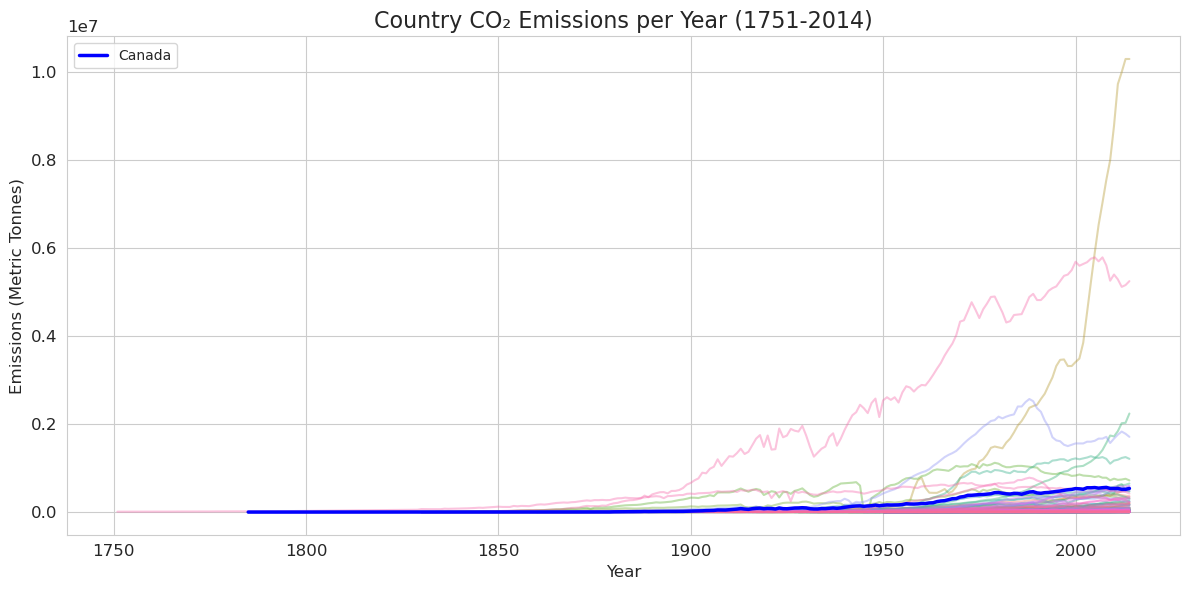

In [23]:

def my_theme():
    sns.set_style("whitegrid")
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "figure.titlesize": 16,
        "axes.titleweight": "normal",
        "figure.autolayout": True,})

my_theme()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data = all_merged_drop[all_merged_drop["Indicator"] == "Emissions"],
    x = "Year",
    y = "Value",
    hue = "Country",
    estimator = None,
    alpha=0.4,
    legend=False)
canada_data = all_merged_drop[(all_merged_drop["Indicator"] == "Emissions") & (all_merged_drop["Country"] == "Canada")]
sns.lineplot(
    data = canada_data,
    x="Year",
    y="Value",
    color="blue",
    label="Canada",
    linewidth=2.5)

plt.title("Country CO\u2082 Emissions per Year (1751-2014)")
plt.xlabel("Year")
plt.ylabel("Emissions (Metric Tonnes)")

plt.legend()
plt.show()

### Top 10 CO2 Emissions-producing Countries Plot

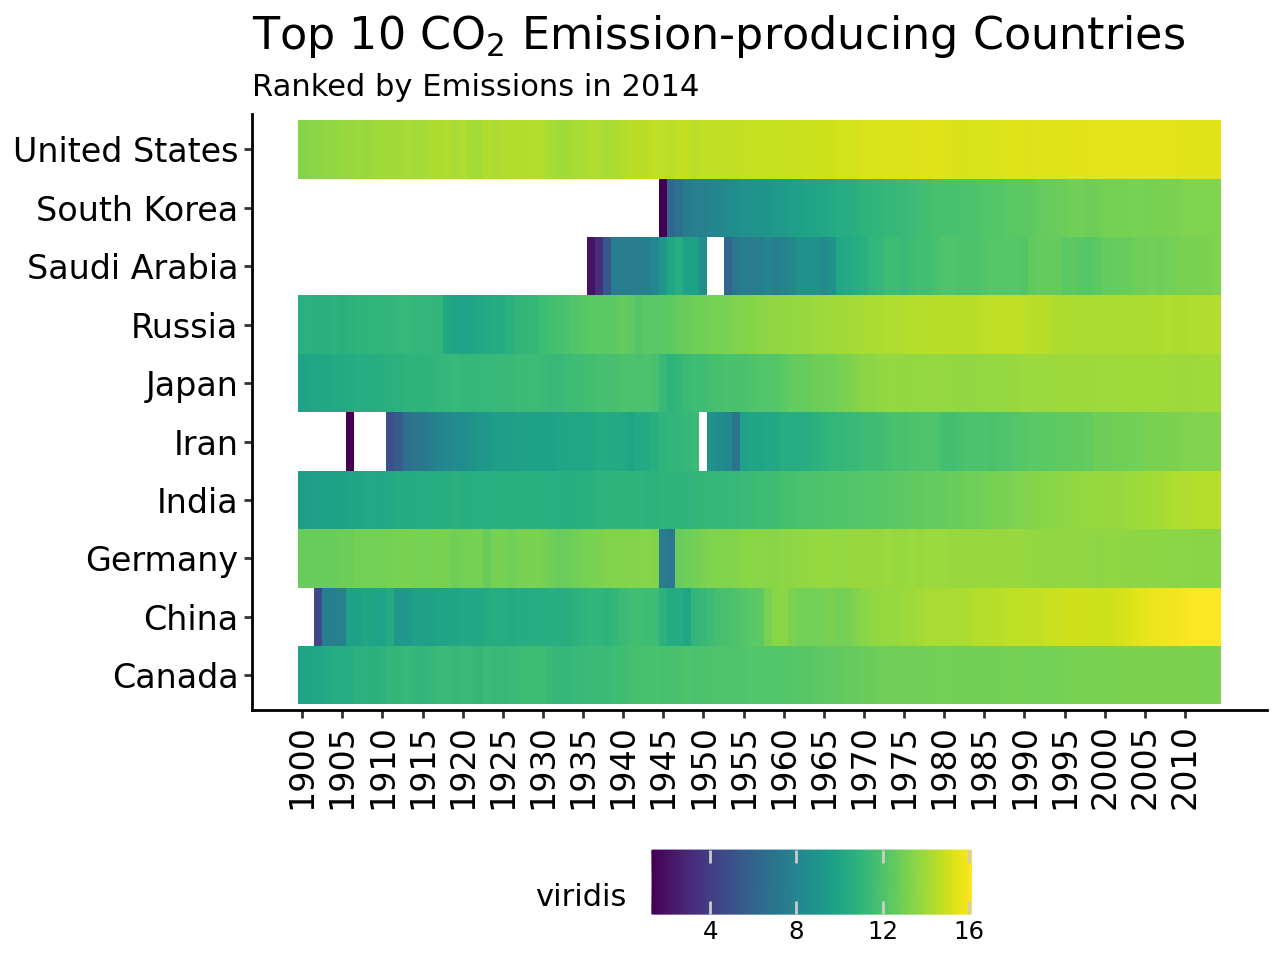

<Figure size 640x480 with 0 Axes>

In [24]:
from plotnine import *
top_10 = ( all_merged_drop[
        (all_merged_drop["Indicator"] == "Emissions") & 
        (all_merged_drop["Year"] == 2014)]
    .assign(rank=lambda df: df["Value"].rank(method="dense", ascending=False).astype(int))
    .query("rank <= 10")
    .sort_values("rank"))

data = all_merged_drop[
    (all_merged_drop["Country"].isin(top_10["Country"])) &
    (all_merged_drop["Indicator"] == "Emissions") &
    (all_merged_drop["Year"] >= 1900)].copy()

order = data[data["Year"] == 2014].set_index("Country")["Value"].sort_values(ascending=False).index
data["Country"] = pd.Categorical(data["Country"], categories=order, ordered=True)

data["logValue"] = np.log(data["Value"])

plot = ( ggplot(data, aes("Year", "Country", fill="logValue"))
    + geom_tile()
    + scale_fill_cmap(name="viridis")
    + scale_x_continuous(breaks = range(1900, 2015, 5), labels = [str(y) for y in range(1900, 2015, 5)])
    + labs(
        title=r"Top 10 CO$_2$ Emission-producing Countries",
        subtitle = "Ranked by Emissions in 2014",
        fill = "Ln(CO2 Emissions)")
    + theme_classic()
    + theme(
        axis_text_x = element_text(size = 12, angle = 90, color = "black"),
        axis_text_y = element_text(size = 12, color = "black"),
        axis_title = element_blank(),
        plot_title = element_text(size = 16),
        legend_position = "bottom"))

plt.savefig('summary_plot1.png', dpi=300, bbox_inches = 'tight')
plot

### Top 10 Emissions-producing Countries title plot (1980-2014)

/tmp/ipykernel_257/28569327.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_257/28569327.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


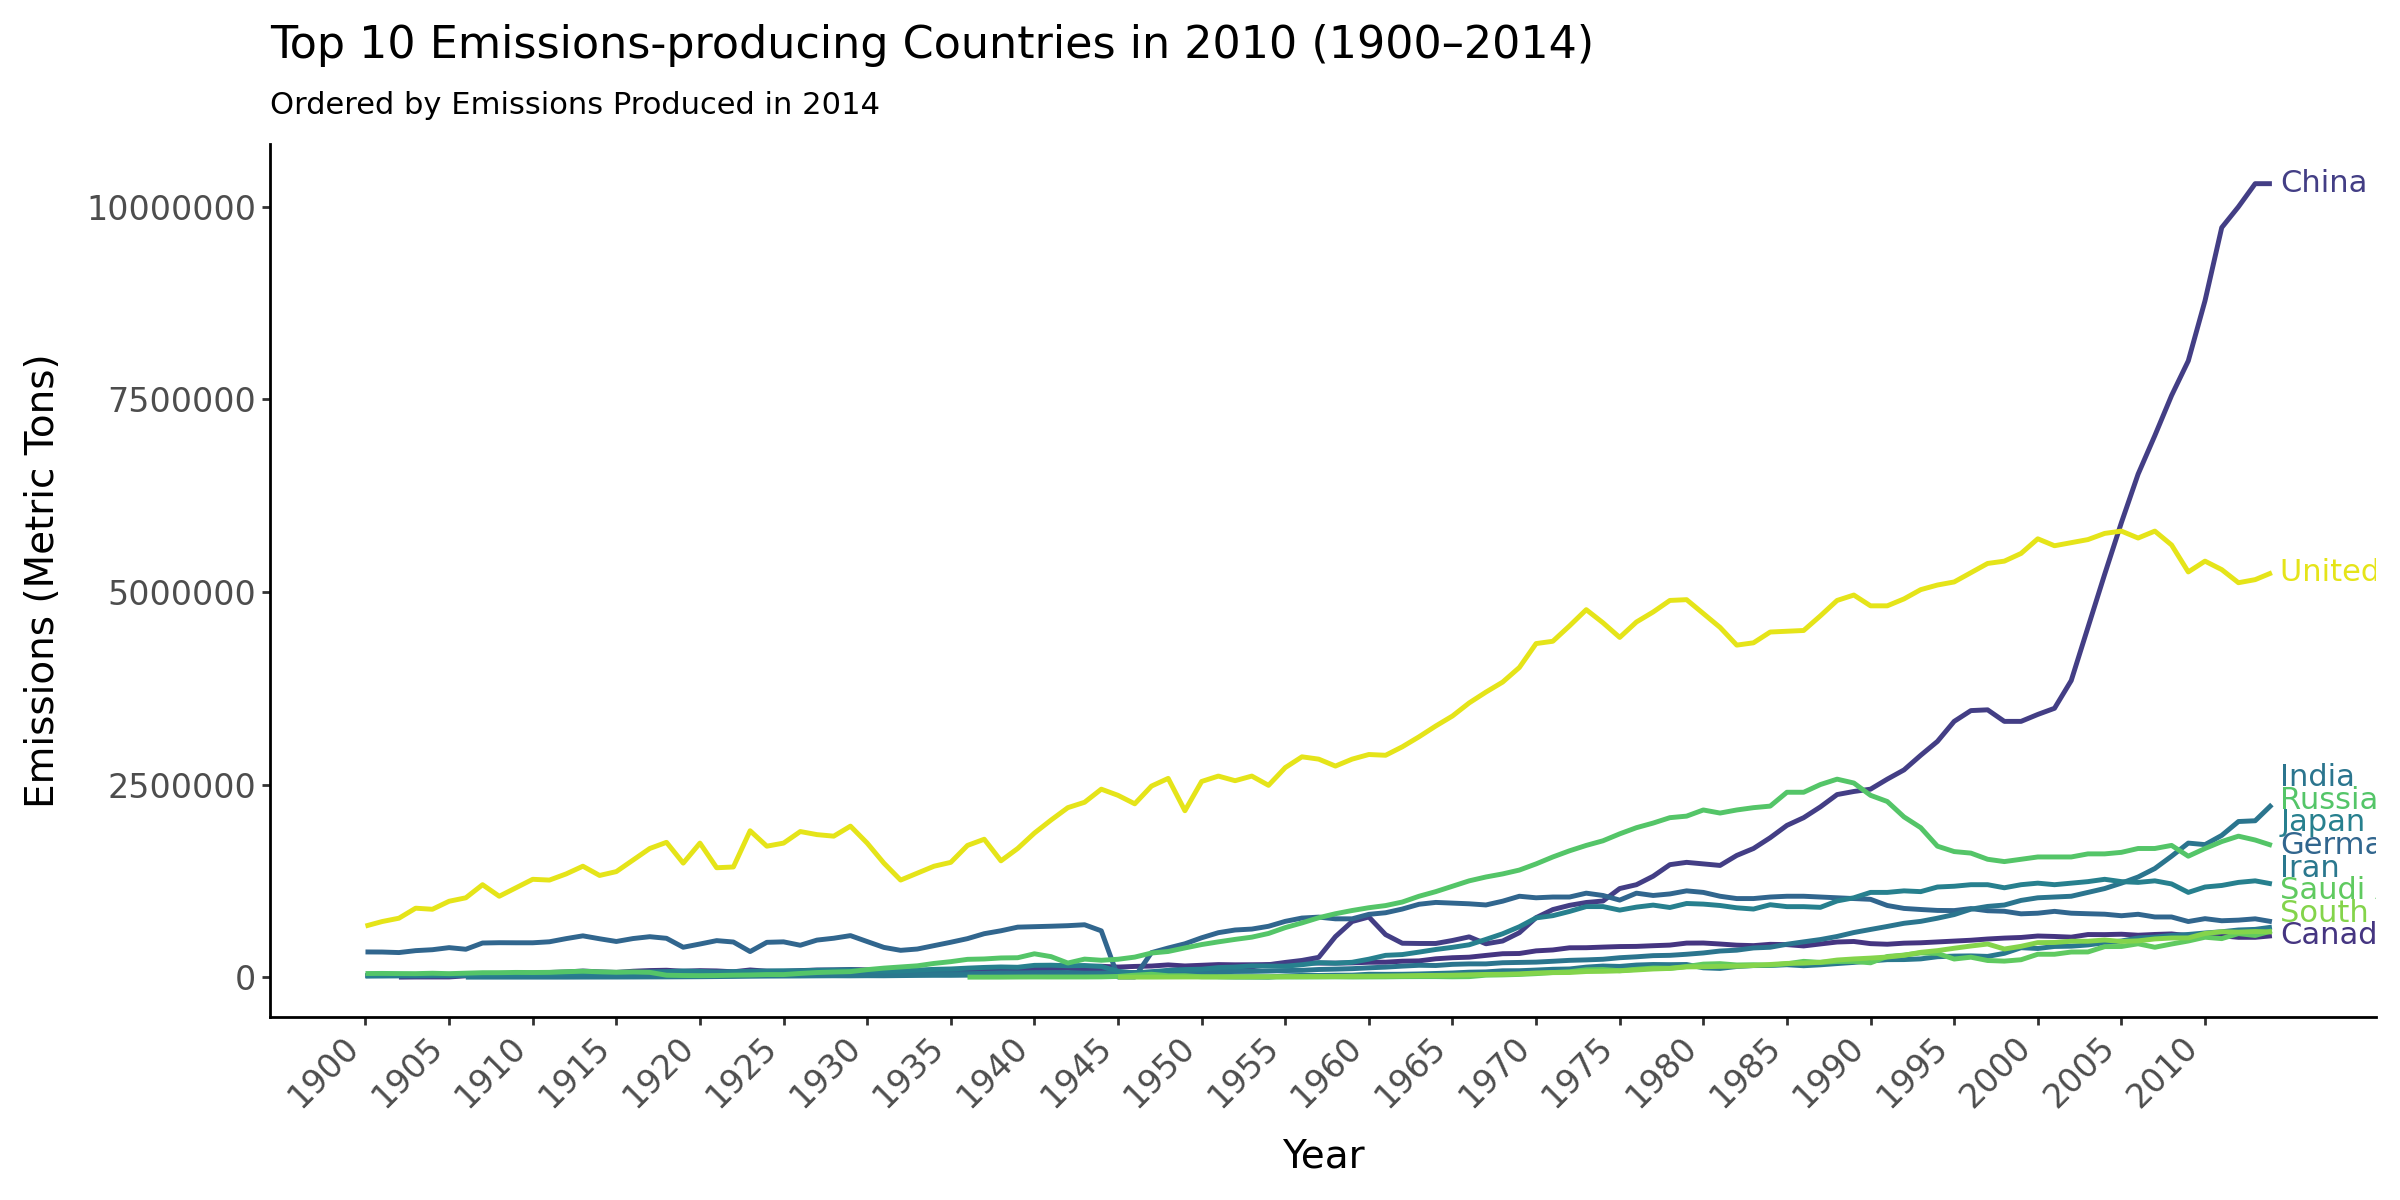

In [25]:
from plotnine import (
    ggplot, aes, geom_line, geom_text, labs, theme_classic,
    theme, element_text, scale_x_continuous
)
from plotnine.scales import scale_color_cmap_d
import pandas as pd
import numpy as np

top_10_count = (
    all_merged_drop[
        (all_merged_drop["Indicator"] == "Emissions") &
        (all_merged_drop["Year"] == 2014)
    ].copy()
)
top_10_count["rank"] = top_10_count["Value"].rank(method="dense", ascending=False).astype(int)
top_10_count = top_10_count[top_10_count["rank"] <= 10].sort_values("rank")
top_10_countries = top_10_count["Country"].tolist()

Top10b = all_merged_drop[
    (all_merged_drop["Country"].isin(top_10_countries)) &
    (all_merged_drop["Indicator"] == "Emissions") &
    (all_merged_drop["Year"] >= 1900)
].copy()

labels_df = Top10b.groupby("Country").apply(
    lambda df: df[df["Year"] == df["Year"].max()]
).reset_index(drop=True)

labels_df = labels_df.sort_values("Value").reset_index(drop=True)
min_dist = 0.03 * (labels_df["Value"].max() - labels_df["Value"].min())
y_positions = labels_df["Value"].values.copy()
for i in range(1, len(y_positions)):
    if y_positions[i] - y_positions[i-1] < min_dist:
        y_positions[i] = y_positions[i-1] + min_dist
labels_df["y_spread"] = y_positions

Top10b_plot = (
    ggplot(Top10b, aes(x="Year", y="Value", color="Country"))
    + geom_line(size=1)
    + geom_text(
        data=labels_df,
        mapping=aes(x="Year", y="y_spread", label="Country"),
        ha="left",
        va="center",
        nudge_x=0.5
    )
    + scale_color_cmap_d(cmap_name="viridis")
    + scale_x_continuous(
        breaks=range(1900, 2015, 5),
        expand=(0.05, 0)
    )
    + labs(
        title="Top 10 Emissions-producing Countries in 2010 (1900–2014)",
        subtitle="Ordered by Emissions Produced in 2014",
        x="Year",
        y="Emissions (Metric Tons)"
    )
    + theme_classic()
    + theme(
        figure_size=(12, 6),
        axis_text_x=element_text(size=12, rotation=45, ha="right"),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        plot_title=element_text(size=16),
        legend_position="none"
    )
)

Top10b_plot

### Distributions of indicators by Year and Value

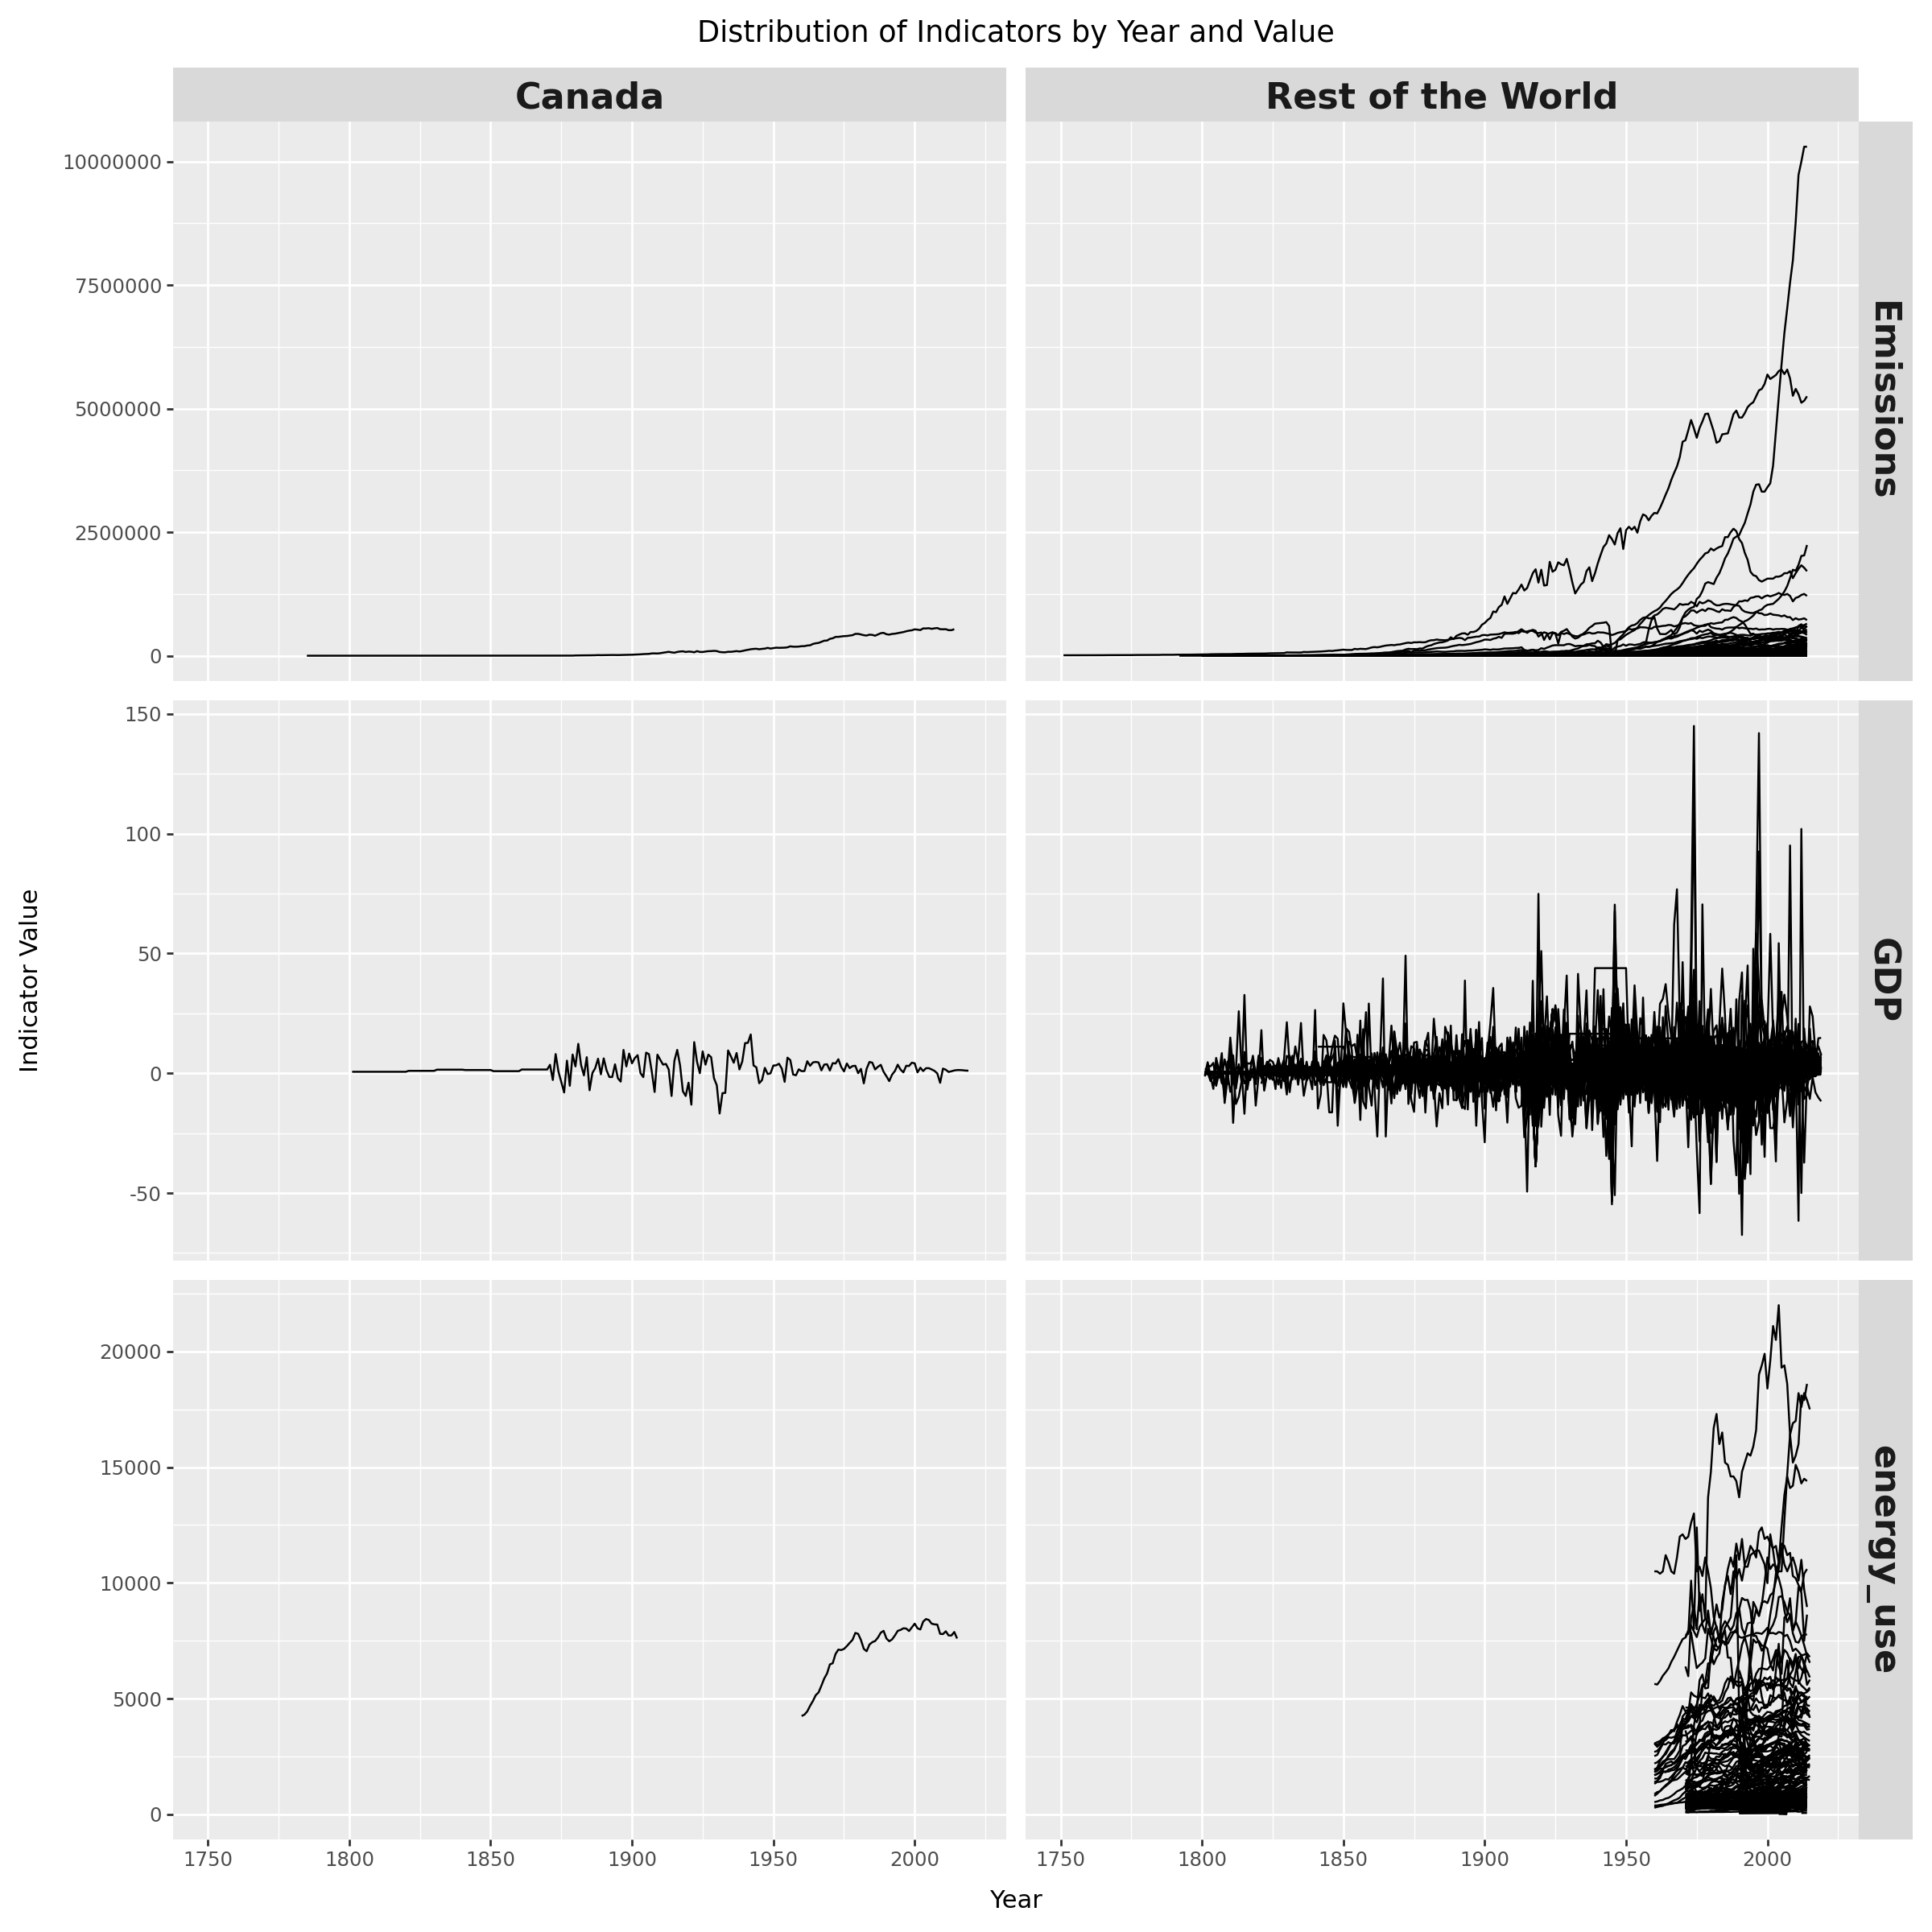

In [26]:
from plotnine import (
    ggplot, aes, geom_line, facet_grid, labs, theme, element_text
)

filtered_df = all_merged_drop[
    ~all_merged_drop["Indicator"].isin(["Disasters", "Temperature"])
].copy()

plot = (
    ggplot(filtered_df, aes(x="Year", y="Value", group="Country"))
    + geom_line()
    + facet_grid("Indicator ~ Region", scales="free_y")
    + labs(
        title="Distribution of Indicators by Year and Value",
        y="Indicator Value"
    )
    + my_theme()  
    + theme(strip_text=element_text(size=16, face="bold"), figure_size=(12, 12))
)

plot

### CO2 Emissions and Temperatures (1980-2014)

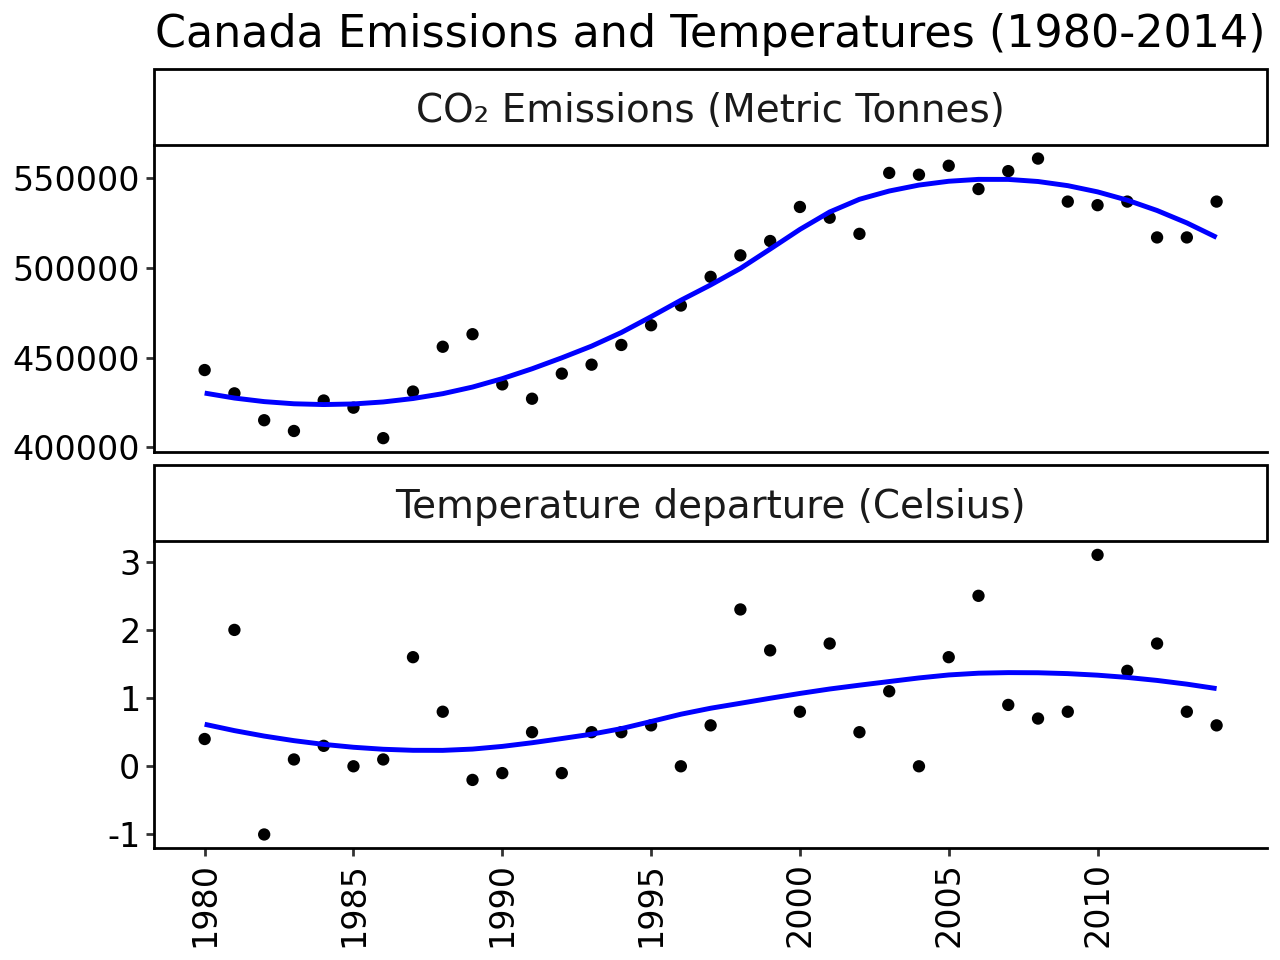

<Figure size 640x480 with 0 Axes>

In [27]:
from plotnine import *
import pandas as pd
!pip install scikit-misc


CO2_temp_Canada = all_merged_drop[
    (all_merged_drop['Country'] == "Canada") &
    (all_merged_drop['Year'] >= 1980) &
    (all_merged_drop['Year'] <= 2014) &
    (all_merged_drop['Indicator'].isin(["Emissions", "Temperature"]))].copy()


if 'Label' not in CO2_temp_Canada.columns:
    CO2_temp_Canada['Label'] = CO2_temp_Canada['Indicator'] 


CO2_temp_Canada['Label'] = pd.Categorical(CO2_temp_Canada['Indicator'], categories = ["Emissions", "Temperature"], ordered=True)

CO2_temp_Canada_facet = (
    ggplot(CO2_temp_Canada, aes(x = 'Year', y = 'Value'))
    + geom_point()
    + geom_smooth(method = 'loess', se = False, color = 'blue')
    + scale_x_continuous(breaks = range(1980, 2015, 5), labels = range(1980, 2015, 5))
    + facet_wrap('~Label', scales='free_y', ncol=1)
    + theme_classic()
    + theme(
        axis_text_x = element_text(size = 12, angle = 90, color = 'black'),
        axis_text_y = element_text(size = 12, color = 'black'),
        strip_text_x = element_text(size = 14),
        axis_title = element_blank(),
        plot_title = element_text(size = 16))
    + labs(title = "Canada Emissions and Temperatures (1980-2014)"))

CO2_temp_Canada["Label"] = CO2_temp_Canada["Indicator"].map({
    "Emissions": "CO₂ Emissions (Metric Tonnes)",
    "Temperature": "Temperature departure (Celsius)"
})

plt.savefig('summary_plot4.png', dpi = 300, bbox_inches = 'tight')
CO2_temp_Canada_facet

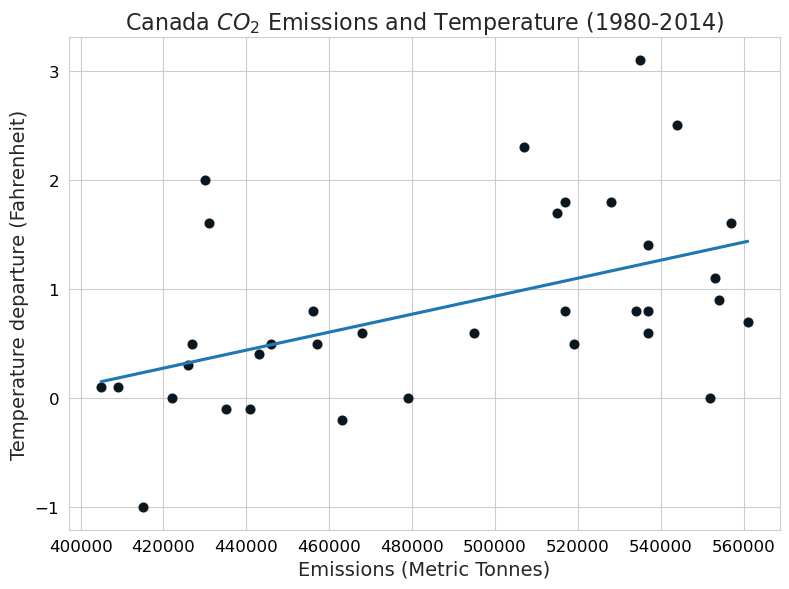

In [28]:
filtered = all_merged_drop[
    (all_merged_drop['Country'] == "Canada") &
    (all_merged_drop['Year'] >= 1980) &
    (all_merged_drop['Year'] <= 2014)]

filtered = filtered.drop(columns=['Label'])
wide_Canada = filtered.pivot(index = 'Year', columns = 'Indicator', values = 'Value').reset_index()


sns.set_style("whitegrid")

plt.figure(figsize = (8,6))

sns.scatterplot(data= wide_Canada, x = 'Emissions', y = 'Temperature')

plt.title("US Emissions and Temperature (1980-2014)", fontsize=16)
plt.xlabel("Emissions (Metric Tonnes)", fontsize=14)
plt.ylabel("Temperature departure (Fahrenheit)", fontsize=14)

plt.xticks(fontsize=12, color = 'black')
plt.yticks(fontsize=12, color = 'black')
sns.regplot(data=wide_Canada, x = 'Emissions', y='Temperature', ci = None, scatter_kws={'color' : 'black', "s": 40})

plt.title("Canada $CO_2$ Emissions and Temperature (1980-2014)", fontsize = 16)
plt.xlabel("Emissions (Metric Tonnes)", fontsize = 14)
plt.ylabel("Temperature departure (Fahrenheit)", fontsize = 14)
plt.xticks(fontsize = 12, color = 'black')
plt.yticks(fontsize = 12, color = 'black')

plt.savefig('summary_plot5.png', dpi=300, bbox_inches='tight')
plt.show()

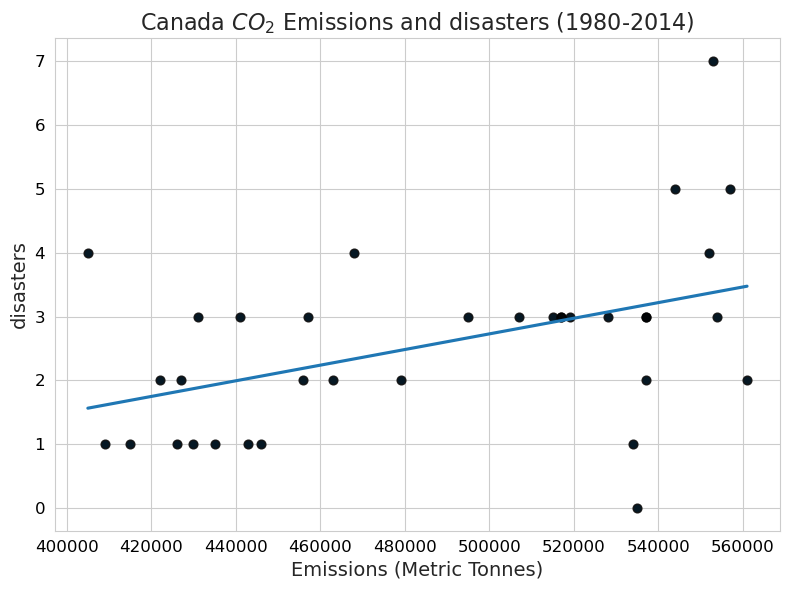

In [29]:
filtered = all_merged_drop[
    (all_merged_drop['Country'] == "Canada") &
    (all_merged_drop['Year'] >= 1980) &
    (all_merged_drop['Year'] <= 2014)]

filtered = filtered.drop(columns=['Label'])
wide_Canada = filtered.pivot(index = 'Year', columns = 'Indicator', values = 'Value').reset_index()


sns.set_style("whitegrid")

plt.figure(figsize = (8,6))

sns.scatterplot(data= wide_Canada, x = 'Emissions', y = 'Disasters')

plt.title("US Emissions and Temperature (1980-2014)", fontsize=16)
plt.xlabel("Emissions (Metric Tonnes)", fontsize=14)
plt.ylabel("Number of disasters", fontsize=14)

plt.xticks(fontsize=12, color = 'black')
plt.yticks(fontsize=12, color = 'black')
sns.regplot(data=wide_Canada, x = 'Emissions', y='Disasters', ci = None, scatter_kws={'color' : 'black', "s": 40})

plt.title("Canada $CO_2$ Emissions and disasters (1980-2014)", fontsize = 16)
plt.xlabel("Emissions (Metric Tonnes)", fontsize = 14)
plt.ylabel("disasters", fontsize = 14)
plt.xticks(fontsize = 12, color = 'black')
plt.yticks(fontsize = 12, color = 'black')

plt.savefig('summary_plot5.png', dpi=300, bbox_inches='tight')
plt.show()

---
# Data Analysis

The final portion of this project is the **Data Analysis**. 
First I will calculate the **mean** and **standard deviation** for both `Emissions` and `Temperature` using the `mean()` and `std()` function respectively. 

In [30]:
mean_emissions = wide_Canada['Emissions'].mean()
print(mean_emissions)
mean_temperature = wide_Canada['Temperature'].mean()
print(mean_temperature)

std_emissions = wide_Canada['Emissions'].std()
print(std_emissions)
std_temperature = wide_Canada['Temperature'].std()
print(std_temperature)

487200.0
0.8285714285714286
51928.00445866203
0.8753390699580123


I will now calculate the `correlation coefficient` for the relation of `Emissions` and `temperature` and between `Emissions` and `Disasters` using the `corr()` function 

In [31]:
correlation = wide_Canada['Emissions'].corr(wide_Canada['Temperature'])
print(f"Correlation coefficient: {correlation:.3f}")

correlation = wide_Canada['Emissions'].corr(wide_Canada['Disasters'])
print(f"Correlation coefficient: {correlation:.3f}")

Correlation coefficient: 0.489
Correlation coefficient: 0.447


Now I will be creating a **scaled** `scatterplot` that plots using the zscores of both `Emissions` and `Temperature` using the `zscore` and `regplot` function. 

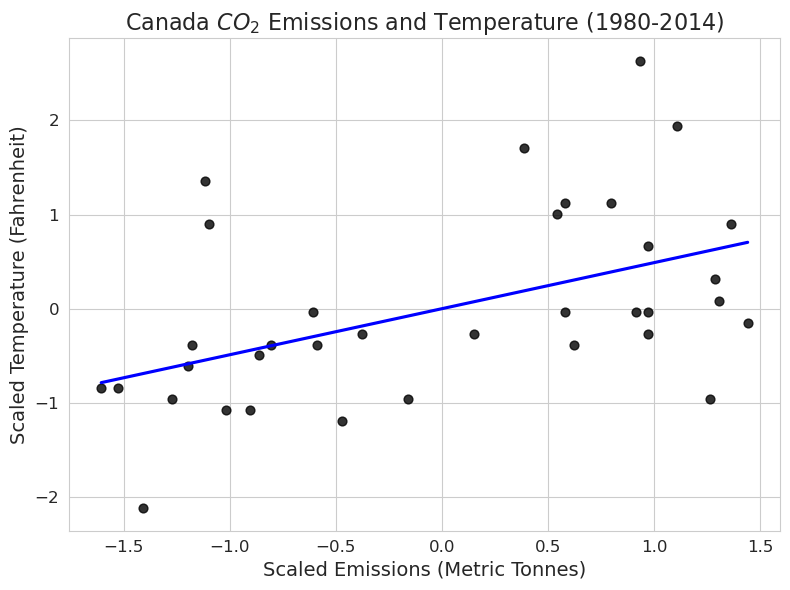

In [32]:
from scipy.stats import zscore


wide_Canada['Emissions_scaled'] = zscore(wide_Canada['Emissions'])
wide_Canada['Temperature_scaled'] = zscore(wide_Canada['Temperature'])

sns.set_style("whitegrid")
plt.figure(figsize = (8,6))

sns.regplot(
    data = wide_Canada,
    x = 'Emissions_scaled',
    y = 'Temperature_scaled',
    ci = None,
    color = 'black',
     line_kws = {'color': 'blue'},
    scatter_kws = {'color': 'black', 's': 40})

plt.title(r"Canada $CO_2$ Emissions and Temperature (1980-2014)", fontsize = 16)
plt.xlabel("Scaled Emissions (Metric Tonnes)", fontsize = 14)
plt.ylabel("Scaled Temperature (Fahrenheit)", fontsize = 14)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
plt.grid(True)  


plt.show()


# Summary 

My results show that the global CO2 emission rates have drastically increased over time. This can be seen very clearly from my graph `Country CO2 emissions per year` where there is a drastic upward increase by many countries starting as early as **1900** for some countries (USA). For Canada in particular, although it is not the most CO2 emitting nation, we are definetly amongst the top few. This can be clearly seen with the `Top 10 CO2 producing Countries` graph which Canada is most definetly on the leaderboard of. 

I would say that CO2 emissions definetly do have some sort of a correlation to the increasing trend in `global temperatures`. This is most evidently seen by the `Canada CO2 emissions and Temperature Scatterplot`. The correlation coefficient for that graph is **0.489** which indicates a moderately positive correlation between the two variables. As with its association with natural disaster rates, there also seems to be a slight correlation as in the plot `Canada CO2 emissions and Disasters Scatterplot` the correlation coefficient between the two variables is **0.447**. This also indicates a moderately positive correlation between the two variables

